Notebook where the code to develop geometric brownian motion and the merton jump diffusion model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.lines import Line2D
from scipy.special import erfinv, erf
from scipy.special import iv #modified bessel function
from scipy import integrate
from scipy.stats import norm
import matplotlib.colors as mcolors

0.65662062077747
0.65662062077747


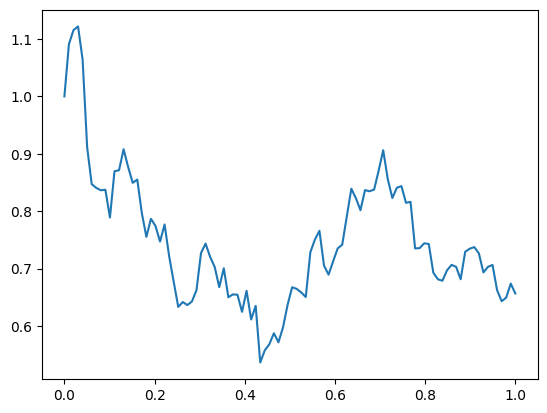

In [19]:
mu = 0.05
sigma = 0.5
s0 = 1
log = []
t = np.linspace(0,1,100)
step = t[1]-t[0]
stock=1
for j in range(1):
    s = []
    s.append(s0)


    for i in range(len(t)-1):
        z = np.random.normal(0,1)
        snext = s[i] * np.exp((mu- 0.5 * sigma**2)*step + sigma*np.sqrt(step)*z)
        s.append(snext)
        stock = stock * np.exp((mu- 0.5 * sigma**2)*step + sigma*np.sqrt(step)*z)
    
    plt.plot(t,s)

print(s[-1])
print(stock)
plt.show()

In [63]:

def GBM(mu,sigma,T,s0):
    t= np.linspace(0,T,100)
    step=t[1]-t[0]
    stock = s0
    for i in range(len(t)):
      z = np.random.normal(0,1)
      stock = stock * np.exp((mu- 0.5 * sigma**2)*step + sigma*np.sqrt(step)*z)
    return stock
mu = 0.05
sigma = 0.5
s0 = 1
T=1
print(GBM(mu,sigma,T,s0))

0.9759323892188753


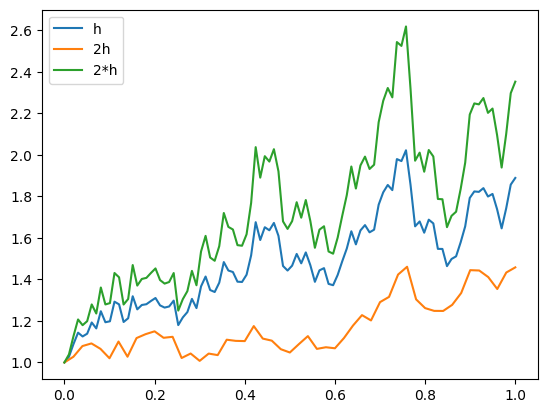

In [3]:
mu = 0.05
sigma = 0.5
s_0 = 1
t = np.linspace(0,1,100)
t1 = np.linspace(0,1,51)
h = t[1]-t[0]
s0=[s_0]
s1 = [s_0]
s2 = [s_0]
for i in range(len(t)-1):
    z = np.random.normal(0,1)
    snext = s0[-1] * np.exp((mu- 0.5 * sigma**2)*h + sigma*np.sqrt(h)*z)
    s0.append(snext)

    snext2 = s2[-1] * np.exp((mu- 0.5 * sigma**2)*2*h + sigma*np.sqrt(2*h)*z)
    s2.append(snext2)
    
    if i%2 ==0:
        snext1 = s1[-1] * np.exp((mu- 0.5 * sigma**2)*h + sigma*np.sqrt(h)*z)
        s1.append(snext1)

plt.plot(t,s0,label = 'h')
plt.plot(t1,s1, label = '2h')
plt.plot(t,s2, label = '2*h')
plt.legend()
plt.show()

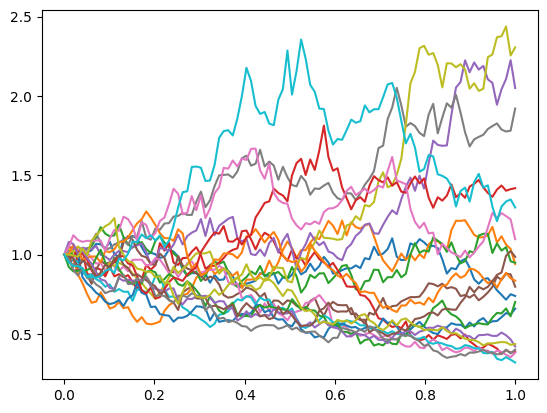

In [4]:
mu = 0.05
sigma = 0.5
s0 = 1
log = []
t = np.linspace(0,1,100)
step = t[1]-t[0]

for j in range(20):
    s = []
    s.append(s0)
    for i in range(len(t)-1):
        z = np.random.normal(0,1)
        snext = s[i] * np.exp((mu- 0.5 * sigma**2)*step + sigma*np.sqrt(step)*z)
        s.append(snext)
    plt.plot(t,s)

plt.show()

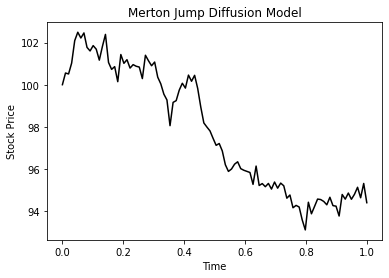

In [40]:
mu = 0.1
sigma = 0.5
s0 = 100

lambda_jump = 1  
mu_jump =0     
sigma_jump = 0.3 
t = np.linspace(0, 1, 100)
step = t[1] - t[0]

s = []
s.append(s0)
for i in range(len(t)-1):
    z = np.random.normal(0, 1)  
    y = np.random.normal(mu_jump, sigma_jump)  
    Nt = np.random.poisson(lambda_jump * step) 
    
    snext = s[i] * np.exp((mu - 0.5 * sigma**2) * step + sigma * np.sqrt(step) * z) * np.exp(Nt * y)
    s.append(snext)

plt.plot(t, s,color='black')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Merton Jump Diffusion Model')
plt.savefig("MertonJump.png", dpi=300)
plt.show()


In [3]:
def GBM_MJD(mu,sigma,T,s0,lambda_jump,mu_jump,sigma_jump):
    t= np.linspace(0,T,100)
    step=T/len(t)
    stock = s0
    #m = lambda_jump * (np.exp(mu_jump + (sigma_jump**2) / 2) - 1) 
    m = lambda_jump * mu_jump*-0.5
    for i in range(len(t)-1):
        #sign = np.random.choice([-1,1])
        z = np.random.normal(0, 1)  
        y = np.random.normal(mu_jump, sigma_jump)  
        Nt = np.random.poisson(lambda_jump * step) 
        stock = stock * np.exp((mu - 0.5 * sigma**2 - m) * step + sigma * np.sqrt(step) * z) * np.exp(Nt * y)
        
    #plt.plot(t,s)
    return stock


def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2 / 2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T)* norm.cdf(d2)

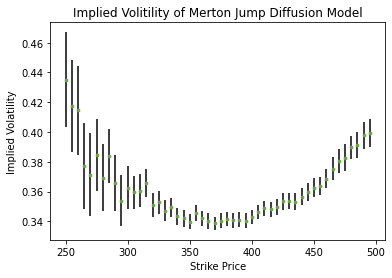

In [6]:
S = 350
r = 0.1 
mu=r
T = 0.25

lambda_jump = 0.1  
mu_jump = 0.1  
sigma_jump = 0.5  
sigma=0.3


conf_level = 0.97
c_p = 1-(1-conf_level)/2
const = np.exp(-r*T)

for k in range(250,500,5):
    M = 300
    V = np.zeros(M)
    
    for i in range(M):
        observed_price = np.zeros(M)
        for s in range(M):
            observed_price[s] = max(GBM_MJD(mu,sigma,T,S,lambda_jump,mu_jump,sigma_jump)-k,0)
        
        op = np.mean(observed_price) * const
        upper = 1
        lower = 0
        n=0
        while n<100:
            mid=(upper+lower)/2
            diff = op - BS_CALL(S, k , T, r, mid)
            if abs(diff) < 0.01:
                break
            elif diff>0:
                lower = mid
            elif diff<0:
                upper = mid
            n+=1
        
        
        V[i] = mid
    
    
    aM = np.mean(V)
    bM = np.std(V)
    c=np.sqrt(2)*erfinv(2*c_p-1)
    conf_lb = aM - c*bM/np.sqrt(M)
    conf_ub = aM + c*bM/np.sqrt(M)
    plt.vlines(k,conf_lb,conf_ub,color='black')
    plt.plot(k,aM,marker='h',markersize=3,color='#6DA34D')

    

plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volitility of Merton Jump Diffusion Model')
plt.savefig("MertonJumpIV.png", dpi=300)
plt.show()